<a href="https://colab.research.google.com/github/minzadinov/HPC-2023/blob/main/vectorsum/vector_sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from functools import partial

Генерация векторов длины n.

In [2]:
def vector_gen(min_n, max_n, step):
  make_vector = lambda n: (torch.tensor(np.random.randn(n)))
  return list(map(make_vector, list(range(min_n, max_n, step))))

Сложение элементов вектора.

In [3]:
def vector_sum_with_time (vector, device):
  dev = torch.device('cpu') if torch.cuda.is_available()==False else device
  vector=vector.to(dev)
  start_time = time.time()
  sum = torch.sum(vector)
  end_time = time.time()
  execution_time = end_time - start_time
  n = vector.size(dim=0)
  return (n, sum, execution_time)

Функция получения времени выполнения по размеру вектора

In [4]:
def get_time_from_size (result, n):
  for i in result:
    if i[0] == n:
      return i[2]

Проверка на идентичность векторов, сложенных разными способами

In [5]:
def error_check (cpu, gpu, err):
  sub = lambda i: torch.subtract(cpu[i][1], gpu[i][1].to(torch.device('cpu')))
  isErr= False
  for i in range(len(cpu)):
    if sub(i).item() > err:
      print('Error with number ', i, ' vector in list' )
      isErr=True
  if isErr==False:
    print('No errors')
  return None

Генерация, сложение и проверка

In [6]:
NMAX=1000000
NMIN=1000
STEP=1000

In [7]:
vector_list=vector_gen(NMIN,NMAX,STEP)
cpu_sum=list(map(partial(vector_sum_with_time, device = torch.device('cpu')), vector_list))
gpu_sum=list(map(partial(vector_sum_with_time, device = torch.device('cuda')), vector_list))

In [8]:
error_check(cpu_sum, gpu_sum, 0.001)

No errors


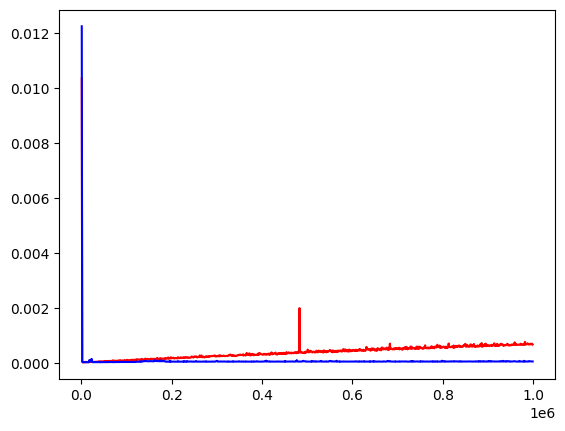

In [10]:
size = list(range(NMIN, NMAX, STEP))
cpu_time = list(map(partial(get_time_from_size, cpu_sum), size))
gpu_time = list(map(partial(get_time_from_size, gpu_sum), size))
plt.plot(size, cpu_time, 'r')
plt.plot(size, gpu_time, 'b')
plt.show()